## Изучение данных из файла

In [1]:
import pandas as pd # <импорт библиотеки pandas>
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/datasets/games.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Всего в таблице 11 столбцов, тип данных у каждого столбца - float64, int64, object. Количество значений в столбцах различается.Это говорит о том, что в данных есть пропущенные значения. Надо привести наименования столбцов к нижнему регистру, изменить тип данных в столбце 'year_of_release'. 

## Предобработка данных

In [2]:
df.columns=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'] #Переименование столбцов.

In [3]:
#df['year_of_release']=pd.to_datetime(df['year_of_release'], format='%Y') #изменение форматат на datatime
#df['year_of_release']=round(df['year_of_release']).dropna().astype('int')
df['name']=df['name'].str.lower() #приведение к нижнему регистру
df['platform']=df['platform'].str.lower() #приведение к нижнему регистру
df['genre']=df['genre'].str.lower()#приведение к нижнему регистру
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.isnull().sum() #выевление пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

    Пропуски есть в столбцах name, year_of_release, critic_score, user_score, rating. Я не владею данными, чтолбы заполнить.

In [5]:
df['name']=df['name'].fillna('unknown') #заполение пропусков
df['genre']=df['genre'].fillna('unknown') #заполение пропусков
df['rating']=df['rating'].fillna('Нет рейтинга')

In [6]:
df['user_score'].unique() #проверка унмикальных значение 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
df['user_score']=df['user_score'].replace('tbd',np.nan, regex=True) #замена на пропуск 
df['user_score']=pd.to_numeric(df['user_score']) #приведение к числовому формату

    Так как некоторые игры еще не получили пользовательскую оценку в данном столбце стоит значение "tbd", чтобы перевести данные в числовой формат заменяем это значение на пропуск количественный.

In [8]:
df['all_sales']= df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales'] #подсчет всех продаж

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
all_sales          16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


**Вывод**

Столбцы переименованы. Тип данных поменян в столбые с пользовательской оценкой на числовой для дальнейшей работы с данными. Нет возможности правдоподобно заполнить пропуски. Данных в столбцах с оценками и рейтингомможет не быть  как из-за сбоя, так и из-за возраста игр (иил слишком старые или наоборот). Пропуски в наименовании и году выпуска явно техническая ошибка.

## Исследовательский анализ данных

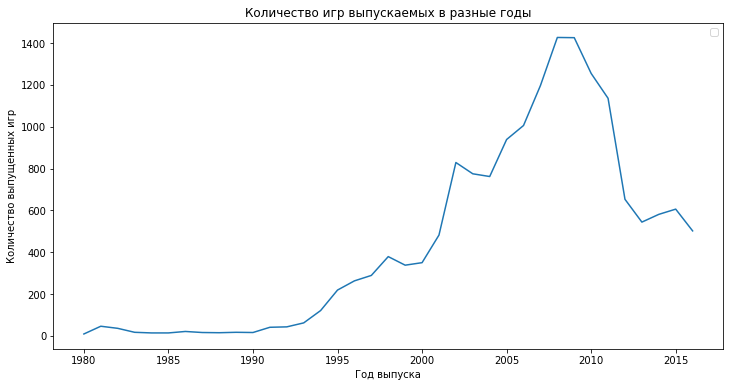

In [10]:
games_years=df.pivot_table(index=['year_of_release'], values='name', aggfunc='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=games_years)
plt.title("Количество игр выпускаемых в разные годы")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.show()

В таблице данные с 1980 по 2016 год, из графика видно, что до 2008/2009 продажи росли, после наблюдается спад. Данные за весь период явно не понядобятся в дальнейшем анализе.

Text(0, 0.5, 'Количество продаж')

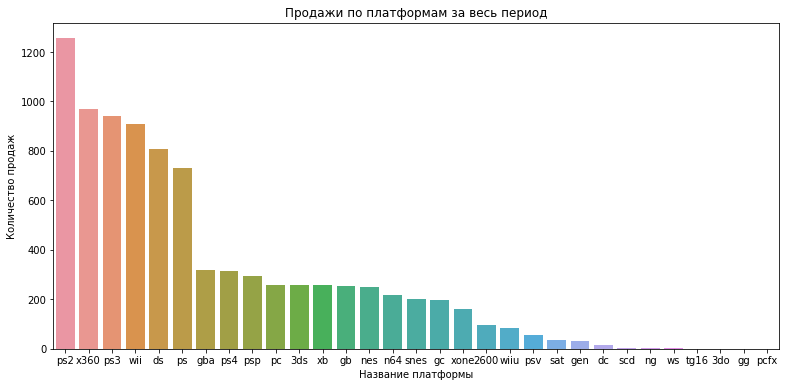

In [11]:
#построени тадицы продаж по платформам
platform_sales=df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales',ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales.index,y=platform_sales['all_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

In [12]:
platform_sales_10=platform_sales.head(10) #выделение топ 10 платформ по продажам за весь период

Text(0, 0.5, 'Количество продаж')

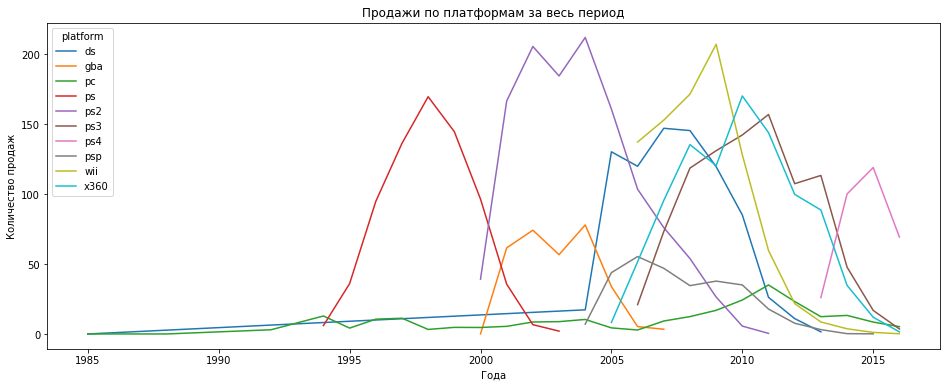

In [13]:
platform_years=df.pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc='sum')
platform_years_pd=pd.DataFrame(platform_years.to_records())
platforms_10=platform_years_pd.query('platform in @platform_sales_10.index')

plt.figure(figsize=(16,6))
sns.lineplot(x="year_of_release", y="all_sales", hue="platform", data=platforms_10)
plt.title("Продажи по платформам за весь период")
plt.xlabel("Года")
plt.ylabel("Количество продаж")

NJg 10 cамых прибыльных платформ за все время ps2, xbox360, ps3, wiil, ds, ps, gba, ps4, psp, pc. Характерный срок жизни платформы 10 лет, однако, pc выделяется на их фоне своей продолжительностью жизни.

Далее будут рассматриваться данные за период с 2013 по 2016 гг., т.к. в этот период произошла стабилизация рынка после бурных продаж

In [14]:
df_actual=df.query('year_of_release > 2012') #выбор данных только за актуальные года
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,Нет рейтинга,14.63
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,Нет рейтинга,14.60
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01


In [15]:
#составление таблицы по продажам по платформам зп актуальные года
df_actual_pl_10=df_actual.pivot_table(index=['platform'], values='all_sales', aggfunc='sum').sort_values(by='all_sales',ascending=False).head(10)
df_actual_pl_10

,all_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80
wiiu,64.63
pc,39.43
psv,32.99
wii,13.66


Text(0, 0.5, 'Количество продаж')

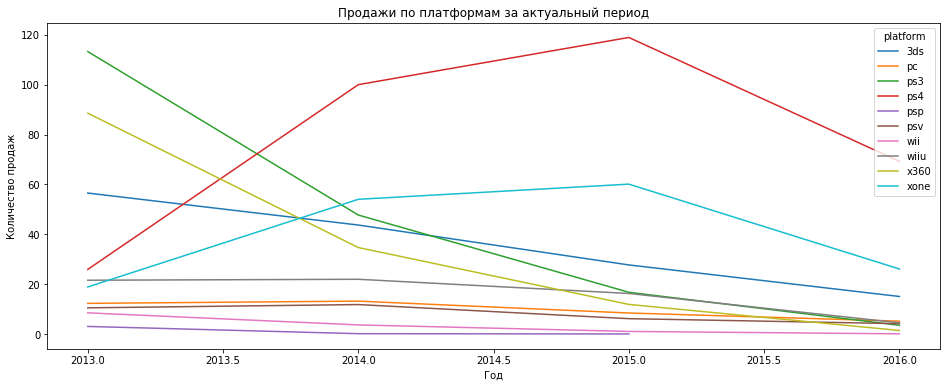

In [16]:
df_actual_sales=df_actual.pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc='sum') #распределение продаж по платформам и годам за акт. время
df_actual_sales_pd=pd.DataFrame(df_actual_sales.to_records())
platforms_actual_10=df_actual_sales_pd.query('platform in @df_actual_pl_10.index') #выбор только топовых платформ
plt.figure(figsize=(16,6))
sns.lineplot(x="year_of_release", y="all_sales", hue="platform", data=platforms_actual_10)
plt.title("Продажи по платформам за актуальный период")
plt.xlabel("Год")
plt.ylabel("Количество продаж")

    Судя по графику самыми потонцеально прибыльными платформами являются ps4 и xone. Стоит таже рассматривать данных по pc, так как, хотя уровень продаж не высокий, это стабильная платформа, которая не исчезнет через 10 лет. Платформу 3ds можно расматривать как актуальную на ближайшие 4 года.

In [18]:
#выделение переспективных платформ
platforms_potential=['ps4','xone', '3ds','pc'] 
df_actual_platforms=df_actual.query('platform in @platforms_potential')
df_actual_platforms.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,641.000000,674.000000,1131.000000
mean,2014.787798,0.222078,0.220159,0.074368,0.063537,72.804992,6.604006,0.580141
std,1.038665,0.535786,0.561038,0.309750,0.168296,12.398250,1.532258,1.305645
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.400000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.900000,0.040000
50%,2015.000000,0.030000,0.040000,0.000000,0.010000,75.000000,6.900000,0.140000
75%,2016.000000,0.170000,0.170000,0.040000,0.045000,81.000000,7.700000,0.480000
max,2016.000000,6.030000,6.310000,4.350000,2.380000,97.000000,9.300000,14.630000


Text(0, 0.5, 'Количество продаж')

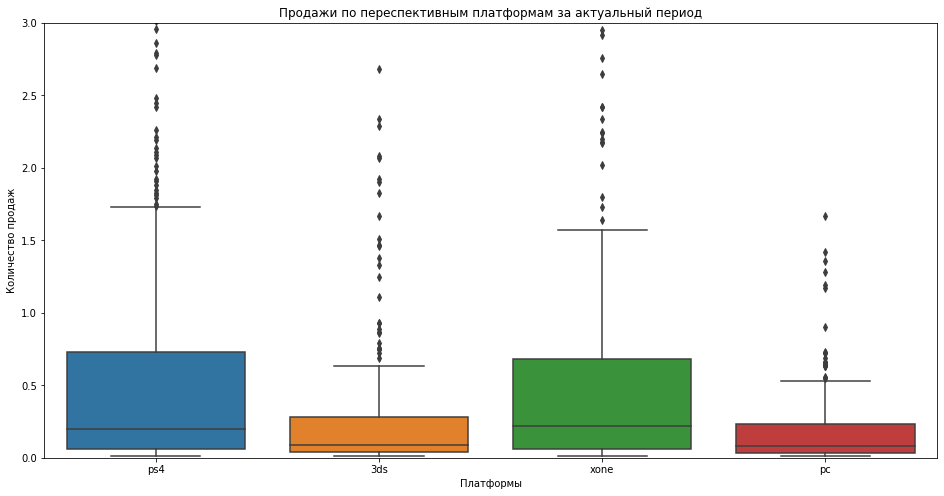

In [19]:
plt.figure(figsize=(16,8))
df_actual_platforms_plot=sns.boxplot(x="platform", y="all_sales", data=df_actual_platforms)
plt.ylim([0,3])
plt.title("Продажи по переспективным платформам за актуальный период")
plt.xlabel("Платформы")
plt.ylabel("Количество продаж")

    Судя по графику медианы продаж у платформ не сильно отличаются и равны примерно 0,1 млн.шт., все имеют скошенность врпаво, а значит в среднем игры продается больше медианы. Имеются вбросы, когда игры продаются больше чем нормальное значение.
    

In [20]:
df_ps4=df_actual.query('platform =="ps4"')  #выбор наиболее прибыльной платформы

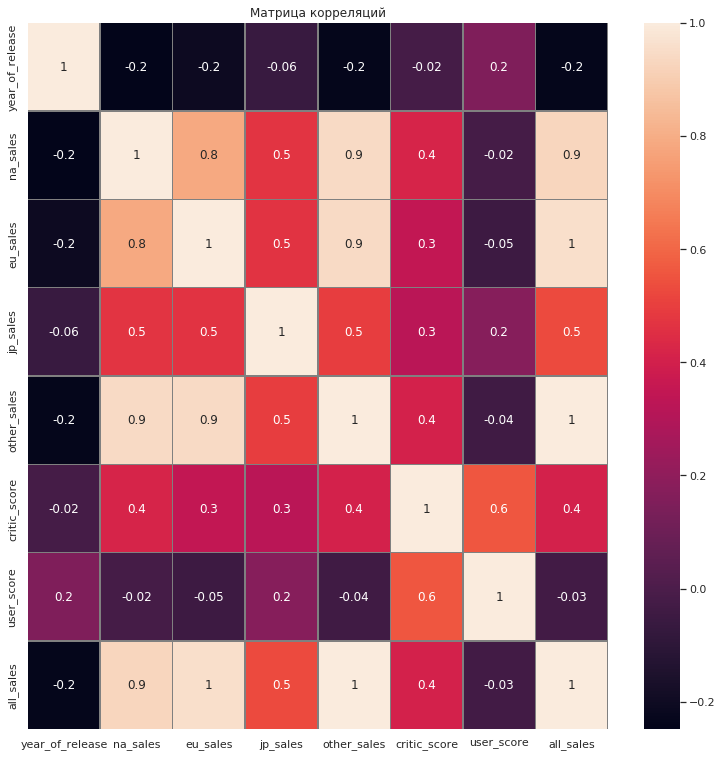

In [42]:
#построение таблицы коэф. корреляции
sns.set(style='white')
plt.figure(figsize=(13, 13))
plt.title('Матрица корреляций')
sns.heatmap(df_ps4.corr(), annot=True, fmt='.1g', linecolor='grey',linewidths=0.5) 
plt.show()

    Судя по таблице, продажи имеют слабую пряму зависимость от оценки критиков (0,4) и совсем незначительну с оценкой пользователей (0,02).

Text(0, 0.5, 'Количество продаж')

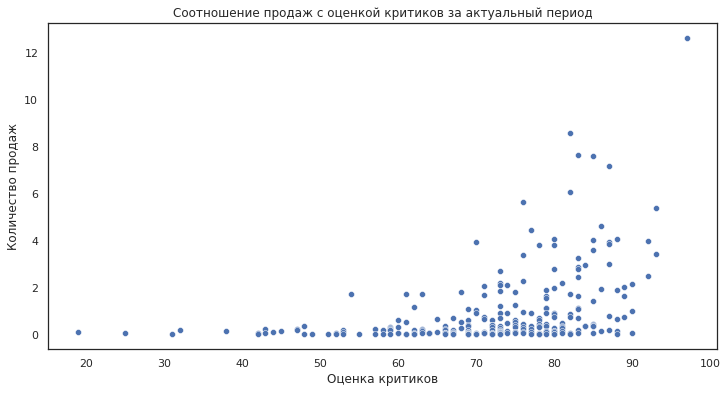

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='all_sales', data=df_ps4) #сравнение проадж и оценки критиков
plt.title("Соотношение продаж с оценкой критиков за актуальный период")
plt.xlabel("Оценка критиков")
plt.ylabel("Количество продаж")

    По грфику видно, что чем больше оценка критиков, тем больще продажи.

Text(0, 0.5, 'Количество продаж')

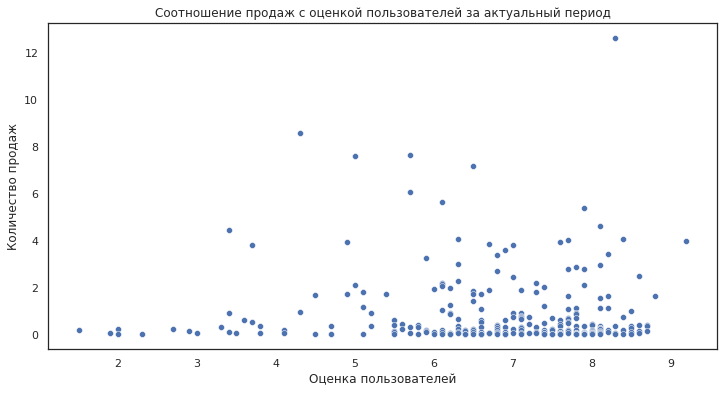

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='all_sales', data=df_ps4) #сравнение проадж и пользовательсокй оценки
plt.title("Соотношение продаж с оценкой пользователей за актуальный период")
plt.xlabel("Оценка пользователей")
plt.ylabel("Количество продаж")

    В случае с оценкой пользователей все не так однозначно. Большие продажи есть и у игр с маленьким рейтингом, хотя все еще сохраняется динамика, чем больше оценка, тем больше продаж.

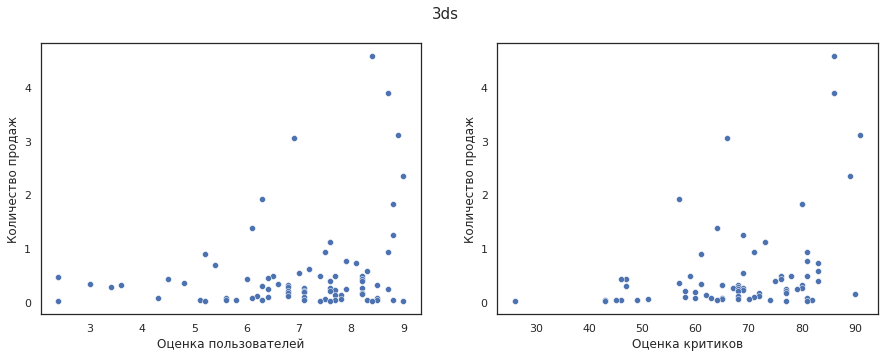

Коэффициент корреляции между продажами и оценкой критиков: 0.35705661422881035
Коэффициент корреляции между продажами и оценкой пользователей: 0.24150411773563016


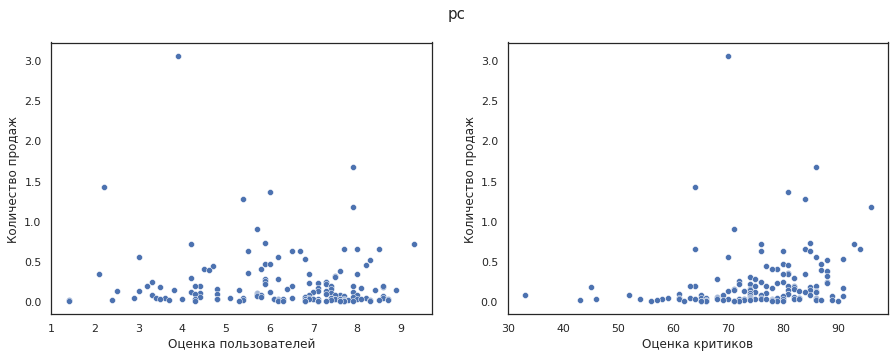

Коэффициент корреляции между продажами и оценкой критиков: 0.19603028294369382
Коэффициент корреляции между продажами и оценкой пользователей: -0.09384186952476739


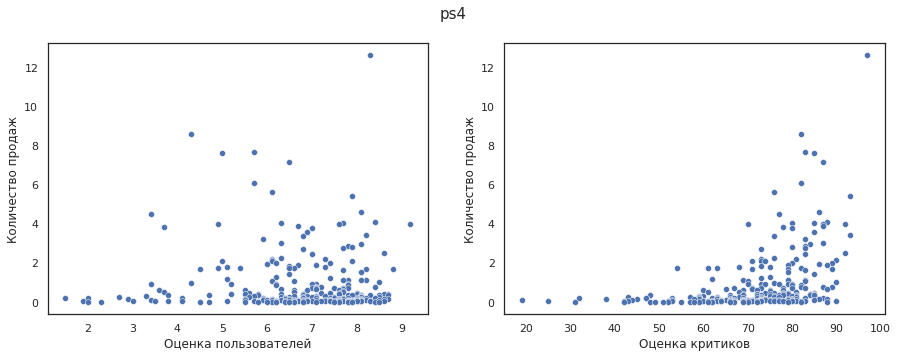

Коэффициент корреляции между продажами и оценкой критиков: 0.406567902061781
Коэффициент корреляции между продажами и оценкой пользователей: -0.031957110204556424


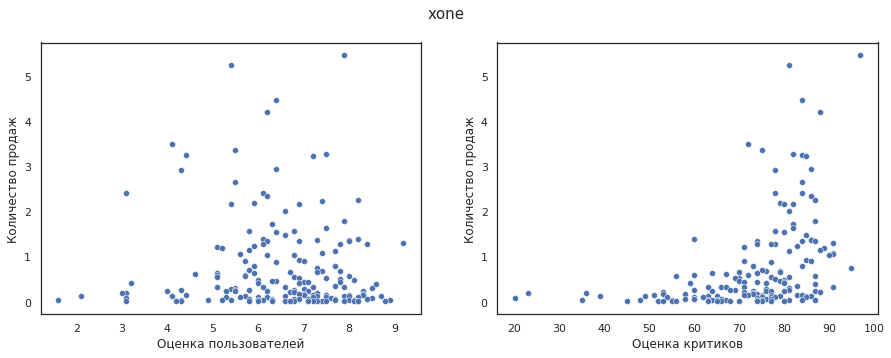

Коэффициент корреляции между продажами и оценкой критиков: 0.41699832800840175
Коэффициент корреляции между продажами и оценкой пользователей: -0.06892505328279412


0    None
1    None
2    None
3    None
Name: platform, dtype: object

In [24]:
df_platform=df_actual_platforms.pivot_table(index=['platform'], values=['all_sales', 'critic_score', 'user_score'], aggfunc='sum')
df_platform_pd=pd.DataFrame(df_platform.to_records())
def corr_score(row):
    platform = df_actual_platforms[df_actual_platforms['platform']==row]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='all_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='all_sales', data=platform, ax=ax[1])
    fig.suptitle(row, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    corr_critic = platform['all_sales'].corr(platform['critic_score'])
    corr_user = platform['all_sales'].corr(platform['user_score'])
    print('Коэффициент корреляции между продажами и оценкой критиков:', corr_critic )
    print('Коэффициент корреляции между продажами и оценкой пользователей:', corr_user)
    
    
df_platform_pd['platform'].apply(corr_score)

    По переспективным платформам динамика не отличается.

In [25]:
genre_sales=df_actual.pivot_table(index=['genre'], values='all_sales', aggfunc=['count','sum']) #построение таблицы распределения продаж по жанру
genre_sales.columns=['count', 'sum']
genre_sales['sales_per_game']=genre_sales['sum']/genre_sales['count']
genre_sales.sort_values(by='sales_per_game',ascending=False)

,count,sum,sales_per_game
genre,,,
shooter,187,232.98,1.245882
sports,214,150.65,0.703972
platform,74,42.63,0.576081
role-playing,292,145.89,0.499623
racing,85,39.89,0.469294
fighting,80,35.31,0.441375
action,766,321.87,0.420196
misc,155,62.82,0.405290
simulation,62,21.76,0.350968


    Судя по таблице, самые продаваемые жанры - это shooter, sports, role-playing и fighting. Хотя больше всего выпусают игр в жанре action, role-playing и adventure. Наименее продаваемые жанры: strategy, puzzle,и adventure. При этом жанр adventure на 3 месте по выпуску игр.

### Вывод
Индустрия на 2016 год переживала спад продаж. Платформы в ср дивут 10 лет, поэтому взяты данные с 2006 года. Наиболее переспективными платформами являются ps4, xone и pc, хотя они как и вся индустрия сейчас имеют спад продаж. Продажи больше зависят оценок критиков, чем пользовательских. Возможно потому, что оценки критиков появляются до выхода игры. Наиболее прибыльные жанры: shooter, platform, sports, fighting и racing.

## Составление портрет пользователя каждого региона

### Самые популярные платформы (топ-5).

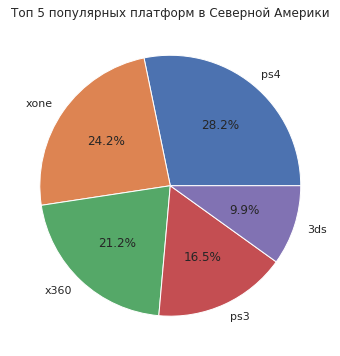

In [26]:
na_platforms=df_actual.pivot_table(index=['platform'], values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head()

plt.figure(figsize=(12,6))
plt.pie(x=na_platforms, labels=na_platforms.index, autopct="%.1f%%")
plt.title("Топ 5 популярных платформ в Северной Америки")
plt.show() 

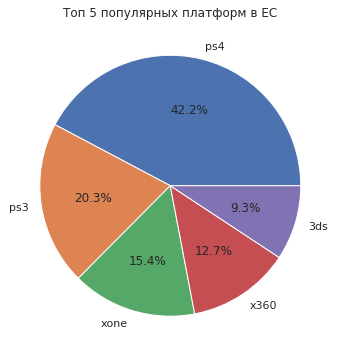

In [27]:
eu_platforms=df_actual.pivot_table(index=['platform'], values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

plt.figure(figsize=(12,6))
plt.pie(x=eu_platforms, labels=eu_platforms.index, autopct="%.1f%%")
plt.title("Топ 5 популярных платформ в ЕС")
plt.show() 

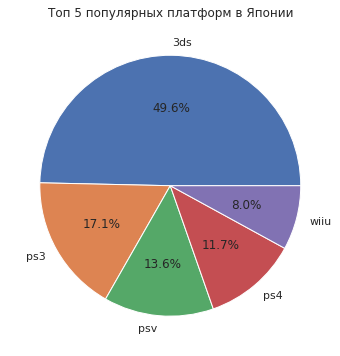

In [28]:
jp_platforms=df_actual.pivot_table(index=['platform'], values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

plt.figure(figsize=(12,6))
plt.pie(x=jp_platforms, labels=jp_platforms.index, autopct="%.1f%%")
plt.title("Топ 5 популярных платформ в Японии")
plt.show() 

### Вывод
Платформы, которые предпочитают пользователи 
 - из Северной Америки: ps4, xone, x360, ps3, 3ds;
 - из ЕС: ps4, ps3, xone, x360, 3ds;
 - из Японии: 3ds, ps3, psv, ps4, wiiu.
 
Таким образом, видно, в Европе и Америке переходят на платформы нового покаления. В целом пердпочтения СА и ЕС похожи. В то время как Яопния предпочитает портативные консоли.

### Самые популярные жанры (топ-5)

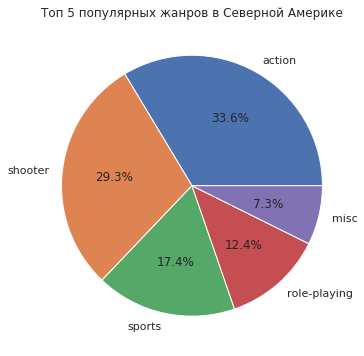

In [29]:
na_genre=df_actual.pivot_table(index=['genre'], values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head()

plt.figure(figsize=(12,6))
plt.pie(x=na_genre, labels=na_genre.index, autopct="%.1f%%")
plt.title("Топ 5 популярных жанров в Северной Америке")
plt.show() 

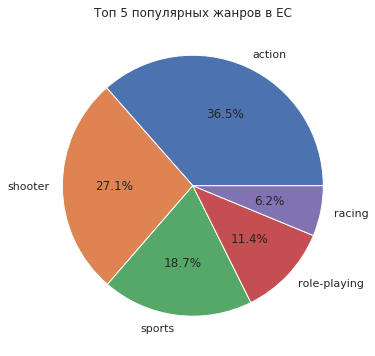

In [30]:
eu_genre=df_actual.pivot_table(index=['genre'], values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

plt.figure(figsize=(12,6))
plt.pie(x=eu_genre, labels=eu_genre.index, autopct="%.1f%%")
plt.title("Топ 5 популярных жанров в ЕС")
plt.show() 

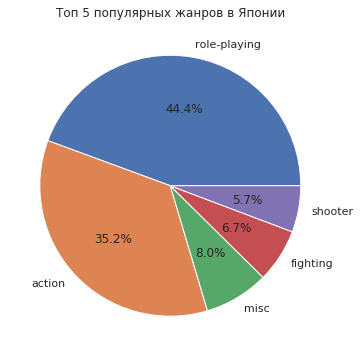

In [31]:
jp_genre=df_actual.pivot_table(index=['genre'], values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

plt.figure(figsize=(12,6))
plt.pie(x=jp_genre, labels=jp_genre.index, autopct="%.1f%%")
plt.title("Топ 5 популярных жанров в Японии")
plt.show()

### Вывод
Жанры, которые предпочитают пользователи 
 - из Северной Америки: action, shooter, sport, role-playing, misc;
 - из ЕС: action, shooter, sport, role-playing, racing;
 - из Японии: role-playing, action, misc, fighting, shooter.

Топ жанров в АС и ЕС очень похож, Япония предпочитает вн. рынок.

### Влияние рейтинга ESRB на продажи

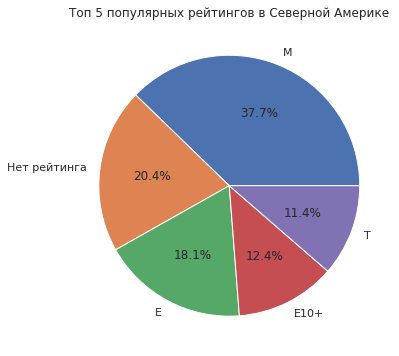

In [32]:
na_rating=df_actual.pivot_table(index=['rating'], values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head()

plt.figure(figsize=(12,6))
plt.pie(x=na_rating, labels=na_rating.index, autopct="%.1f%%")
plt.title("Топ 5 популярных рейтингов в Северной Америке")
plt.show() 

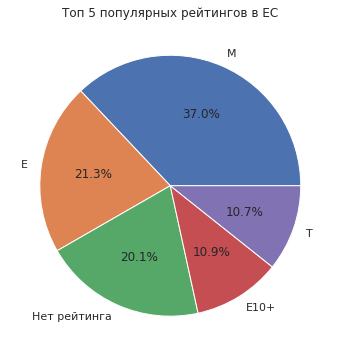

In [33]:
eu_rating=df_actual.pivot_table(index=['rating'], values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

plt.figure(figsize=(12,6))
plt.pie(x=eu_rating, labels=eu_rating.index, autopct="%.1f%%")
plt.title("Топ 5 популярных рейтингов в ЕС")
plt.show() 

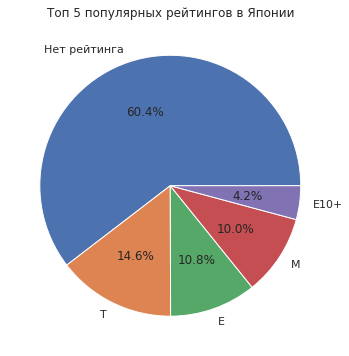

In [34]:
jp_rating=df_actual.pivot_table(index=['rating'], values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

plt.figure(figsize=(12,6))
plt.pie(x=jp_rating, labels=jp_rating.index, autopct="%.1f%%")
plt.title("Топ 5 популярных рейтингов в Японии")
plt.show() 

### Вывод
Рейтинг, который предпочитают пользователи 
 - из Северной Америки: M, Нет рейтинга, E, T, E10+;
 - из ЕС: M, E, Нет рейтинга, E10+, T;
 - из Японии: Нет рейтинга, T, E, M, E10+/
 
В СА предпочитают рейтинг "17+", игры, которые не получили рейтинг и "для всех". В ЕС те же показатели, но в другом порядке. В случае этих частей света мы можем предположть, что "нет рейтинга" у инди-игр.Япония выделяется тем, что больше 60% продаж были за играми, которые не получили рейтинг ESRB. Скорее всего для оценуи этих игр было Это подтверждает теорию о том, что в Японии предпо
читают вн. рынок

## Проверка гипотез

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [35]:
xone=df_actual.query('platform == "xone"')
pc=df_actual.query('platform == "pc"')

In [36]:
alpha = .05 # критический уровень статистической значимости

results_user_score = st.stats.ttest_ind( #проведение ttest для сравнения средних двух выборок
    xone['user_score'].dropna(), 
    pc['user_score'].dropna(),
    equal_var=False)

# тест односторонний: p-value будет в два раза меньше
print('p-значение: ', results_user_score.pvalue)

# тест односторонний вправо:
if (results_user_score.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Вывод
Нулевой гипотезой была выбрана гипотиза, что ср. пользовательский рейтинги платформ Xbox One и PC одинаковый. А альтернативной гипотизой, что это не так. В результате нулевую гипотизу не удалось отвергнуть.

H0:Средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1:Средние пользовательские рейтинги жанров Action и Sports разные.

In [37]:
action=df_actual.query('genre == "action"')
sports=df_actual.query('genre == "sports"')

In [38]:
alpha = .05 # критический уровень статистической значимости

results_user_score = st.stats.ttest_ind( #проведение ttest для сравнения средних двух выборок
    action['user_score'].dropna(), 
    sports['user_score'].dropna(),
    equal_var=False)

# тест односторонний: p-value будет в два раза меньше
print('p-значение: ', results_user_score.pvalue)

# тест односторонний вправо:
if (results_user_score.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


Нуливой гипотизой была выбрана гипотиза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернотивной - средние пользовательские рейтинги жанров Action и Sports разные. В результате нулевую гипотизу удалось отвергнуть.

# Вывод

В результате анализа за период с 2013 по 2016 гг. были выбраны наиболее переспективные платформы для 2017 года: PS4 и XOne. Также можно рассматривать PC. Пользователи во всем мире предпочитают игры в жанре action, хотя самым прибыльным жанром является жанр shooter.

В СА наибольшей популярностью пользуются:
 - платформы: ps4, xone, x360;
 - жанры: action, shooter, sport;
 - рейтинг: M, Нет рейтинга, E.

В ЕС наибольшей популярностью пользуются:
 - платформы: ps4, ps3, xone;
 - жанры: action, shooter, sport;
 - рейтинг: M, E, Нет рейтинга.

В Японии наибольшей популярностью пользуются:
 - платформы: 3ds, ps3, psv;
 - жанры: role-playing, action, misc;
 - рейтинг: Нет рейтинга, T, E.

Самый распространенный рейтинг - E. Гипотизу о том, что ср.пользовательский рейтинг PC и XOne одинаковый не удалось отвергнуть, а гипотизу, что ср.пользовательские рейтинги жанров Action и Sports одиаковые отвергнуть удалось.